<a href="https://colab.research.google.com/github/ImranKhan-SoftwareEngineer/pythonlearning/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
                       #irst layer ma 32 image bana
                       #(3, 3) is filter
# filter is scanner to scan the image shows in figure 5.1
model.add(layers.MaxPooling2D((2, 2)))
# MaxPool bari pixel(sharp) select karta ha
# image ka size reduce hojayga pixel wise
# image size kam hoga to wight b kam lagayga
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [0]:
# conglunatal network ko dense network ma conver karna ko classifier network ketha hain
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

W0827 18:15:32.558093 139982187476864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 18:15:32.586262 139982187476864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0827 18:15:32.739012 139982187476864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0827 18:15:32.976207 139982187476864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/5
60000/60000 [==============================] - 54s 900us/step - loss: 0.2610 - acc: 0.9218
Epoch 2/5
60000/60000 [==============================] - 53s 880us/step - loss: 0.0781 - acc: 0.9781
Epoch 3/5
60000/60000 [==============================] - 53s 882us/step - loss: 0.0628 - acc: 0.9833
Epoch 4/5
60000/60000 [==============================] - 53s 878us/step - loss: 0.0563 - acc: 0.9864
Epoch 5/5
60000/60000 [==============================] - 53s 883us/step - loss: 0.0476 - acc: 0.9885


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 273us/step


In [0]:
test_acc

0.9868

if small data then do the data augmentation (Generate more date from given data)

# **Cats and Dogs Dataset**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/Deep_Learning/'

In [0]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imran3540033","key":"f04e4fafd65c11da2051fbe3446d901d"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [0]:
#Download required dataset / competition files to a folder of your choice
!kaggle competitions download -c dogs-vs-cats -p /content/gdrive/My\ Drive/dogs_vs_cats

#List datasets and competitions
!kaggle datasets list   
!kaggle competitions list

#Search for datasets and competitions by name
!kaggle datasets list -s dogs_vs_cats
!kaggle competitions list -s dogs-vs-cats

403 - Forbidden
ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           1254  
AnalyzeBoston/crimes-in-boston                            Crimes in Boston                                   10MB  2018-09-04 17:56:03          12740  
bradklassen/pga-tour-20102018-data                        PGA Tour Golf Data                                 92MB  2019-08-20 10:32:59           4110  
jolasa/waves-measuring-buoys-data-mooloolaba              Waves Measuring Buoys Data                        599KB  2019-07-07 16:59:44           1358  
doit-intl/autotel-shared-car-locations                    Shared Cars Lo

In [0]:
import os
os.chdir('/content/drive/My Drive/Deep_Learning/kaggle/dogs-vs-cats')

In [0]:
ls

sampleSubmission.csv  test1/  test1.zip  train/  train.zip


In [0]:
!mkdir train  #create a directory named train/
!mkdir test1  #create a directory named test/
!unzip -q train.zip -d train/  #unzip data in train/
!unzip -q test1.zip -d test1/  #unzip data in test/

In [0]:
import os, shutil
original_dataset_dir = '/content/drive/My Drive/Deep_Learning/kaggle/dogs-vs-cats/train'
base_dir = '/content/drive/My Drive/Deep_Learning/kaggle/cats_and_dogs'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [0]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [0]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [0]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [0]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [0]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
def generator():
  i = 0
  while True:
    i += 1
    yield i
    
for item in generator():
  print(item)
  if item > 4:
    break

1
2
3
4
5


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

W0829 04:57:07.675789 139633684195200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 113s 1s/step - loss: 0.6881 - acc: 0.5355 - val_loss: 0.6639 - val_acc: 0.6150
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 0.6515 - acc: 0.6200 - val_loss: 0.6382 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 110s 1s/step - loss: 0.5967 - acc: 0.6835 - val_loss: 0.6290 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.5600 - acc: 0.7105 - val_loss: 0.6007 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 110s 1s/step - loss: 0.5355 - acc: 0.7325 - val_loss: 0.6147 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 114s 1s/step - loss: 0.5083 - acc: 0.7545 - val_loss: 0.6041 - val_acc: 0.6620
Epoch 7/30
100/100 [==============================] - 115s 1s/step - loss: 0.4917 - acc: 0.7455 - val_loss: 0.6255 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 115s 1s/step - 

In [0]:
model.save('cats_and_dogs_small_1.h5')

NameError: ignored

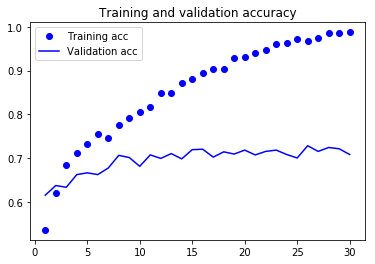

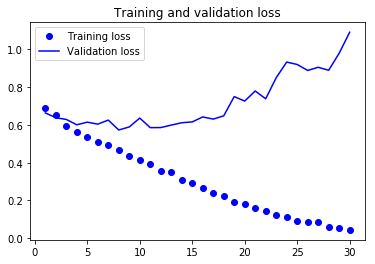

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# model.load for load model

In [0]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples), max_length,max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [0]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0